# R Aquilae: Observations CO J=2-1
---

In [1]:
import matplotlib.pyplot as plt
import numpy             as np
import torch.nn          as nn
import torch

from torch.optim          import Adam
from tqdm                 import tqdm
from astropy              import units, constants
from ipywidgets           import interact

from pomme.utils       import convert_angular_to_spatial
from pomme.plot        import plot_cube_2D, plot_spectrum
from pomme.object      import AstroObject
from pomme.observation import DataCube, Beam

from pomme.model       import TensorModel, SphericallySymmetric
from pomme.utils       import print_var, interpolate, convert_angular_to_spatial
from pomme.lines       import Line
from pomme.loss        import Loss, diff_loss

In [2]:
obj = AstroObject('R Aql')

Using the parallax distance.


In [3]:
file = '/STER/hydroModels/jolienm/RAqlObservations/RAql-observations/ALMA_analysis/data/R_Aql/R_Aql_combined111_line_t0.15_spw2_CO.fits'
dat  = DataCube(file)

In [4]:
dat.img     = np.nan_to_num(dat.img, nan=0.0)
dat.img_min = dat.img.min()
dat.img_max = dat.img.max()

In [5]:
dat.plot_channel_maps()

interactive(children=(IntSlider(value=19, description='f', max=39), Output()), _dom_classes=('widget-interact'…

<function pomme.observation.DataCube.plot_channel_maps.<locals>.plot(f)>

In [6]:
dat.plot_spectrum()

interactive(children=(IntSlider(value=4095, description='i', max=8191), IntSlider(value=4095, description='j',…

<function pomme.observation.DataCube.plot_spectrum.<locals>.plot(i, j)>

In [7]:
fi_min, fi_max =    6,   35
xi_min, xi_max = 2500, 5700
yi_min, yi_max = 2500, 5700

obs       = dat.img[fi_min:fi_max, xi_min:xi_max, yi_min:yi_max].astype(np.float64)
obs_freqs = dat.fs [fi_min:fi_max]
obs_xlims = dat.xs [xi_max] - dat.xs[xi_min]
obs_ylims = dat.xs [xi_max] - dat.xs[xi_min]

In [8]:
xs = dat.xs[xi_min:xi_max]
ys = dat.ys[yi_min:yi_max]
xs = xs - np.mean(xs)
ys = ys - np.mean(ys)
xs_min = xs.to('arcsec')[ 0].value
xs_max = xs.to('arcsec')[-1].value
ys_min = ys.to('arcsec')[ 0].value
ys_max = ys.to('arcsec')[-1].value

In [9]:
obs *= (1.0/obs.max())

In [10]:
s_x = abs(convert_angular_to_spatial(obs_xlims, obj.distance)).si.value
s_y = abs(convert_angular_to_spatial(obs_ylims, obj.distance)).si.value
s_z = np.mean([s_x, s_y])

In [11]:
vmin = obs.min()
vmax = obs.max()

# Define a plot function
def plot(f):
    plt.figure(dpi=150)
    plt.imshow(obs[f,:,:], vmin=vmin, vmax=vmax)
            
interact(plot, f=(0, obs.shape[0]-1))

interactive(children=(IntSlider(value=14, description='f', max=28), Output()), _dom_classes=('widget-interact'…

<function __main__.plot(f)>

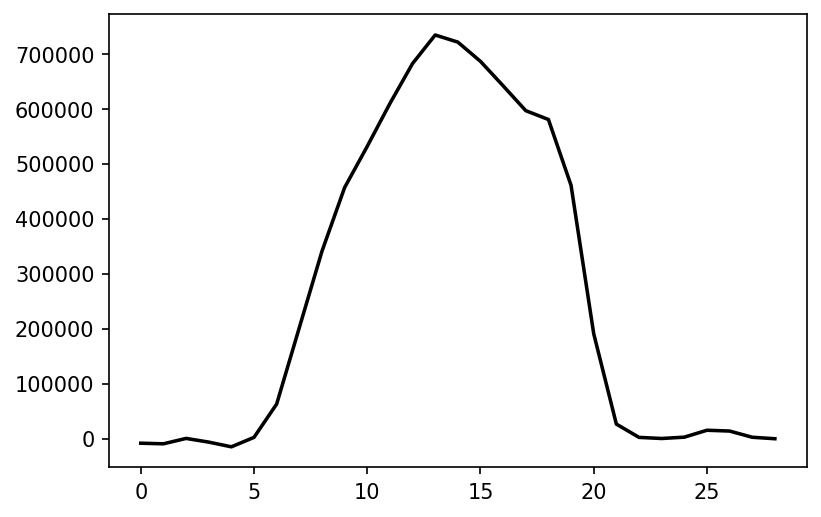

In [12]:
plt.figure(dpi=150)
plt.plot(obs.sum(axis=(1,2)), c='k', linewidth=1.7)

In [13]:
line = Line('CO', 1)

You have selected line:
    CO(J=2-1)
Please check the properties that were inferred:
    Frequency         2.305380000e+11  Hz
    Einstein A coeff  6.910000000e-07  1/s
    Molar mass        28.0101          g/mol


/home/frederikd/.local/lib/python3.9/site-packages/astroquery/lamda/core.py:145: UserWarning: The first time a LAMDA function is called, it must assemble a list of valid molecules and URLs.  This list will be cached so future operations will be faster.
  warnings.warn("The first time a LAMDA function is called, it must "


In [14]:
velos = (1.0 - obs_freqs / (line.frequency * units.Hz)) * constants.c
velos = velos - np.mean(velos)
velos = velos.to('km/s').value
velos

array([-1.77791110e+01, -1.65091745e+01, -1.52392380e+01, -1.39693015e+01,
       -1.26993650e+01, -1.14294285e+01, -1.01594920e+01, -8.88955549e+00,
       -7.61961899e+00, -6.34968249e+00, -5.07974599e+00, -3.80980950e+00,
       -2.53987300e+00, -1.26993650e+00, -1.60725904e-11,  1.26993650e+00,
        2.53987300e+00,  3.80980950e+00,  5.07974599e+00,  6.34968249e+00,
        7.61961899e+00,  8.88955549e+00,  1.01594920e+01,  1.14294285e+01,
        1.26993650e+01,  1.39693015e+01,  1.52392380e+01,  1.65091745e+01,
        1.77791110e+01])

In [15]:
spatial_average = obs.sum(axis=(1,2))
line_centre     = obs_freqs[np.where(spatial_average==spatial_average.max())[0][0]]
line_centre

<Quantity 2.30502374e+11 Hz>

In [16]:
obs_freqs

<Quantity [2.30515069e+11, 2.30514092e+11, 2.30513116e+11, 2.30512139e+11,
           2.30511163e+11, 2.30510186e+11, 2.30509210e+11, 2.30508233e+11,
           2.30507256e+11, 2.30506280e+11, 2.30505303e+11, 2.30504327e+11,
           2.30503350e+11, 2.30502374e+11, 2.30501397e+11, 2.30500420e+11,
           2.30499444e+11, 2.30498467e+11, 2.30497491e+11, 2.30496514e+11,
           2.30495538e+11, 2.30494561e+11, 2.30493584e+11, 2.30492608e+11,
           2.30491631e+11, 2.30490655e+11, 2.30489678e+11, 2.30488702e+11,
           2.30487725e+11] Hz>

In [17]:
import matplotlib
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

Text(0, 0.5, 'y [arc sec]')

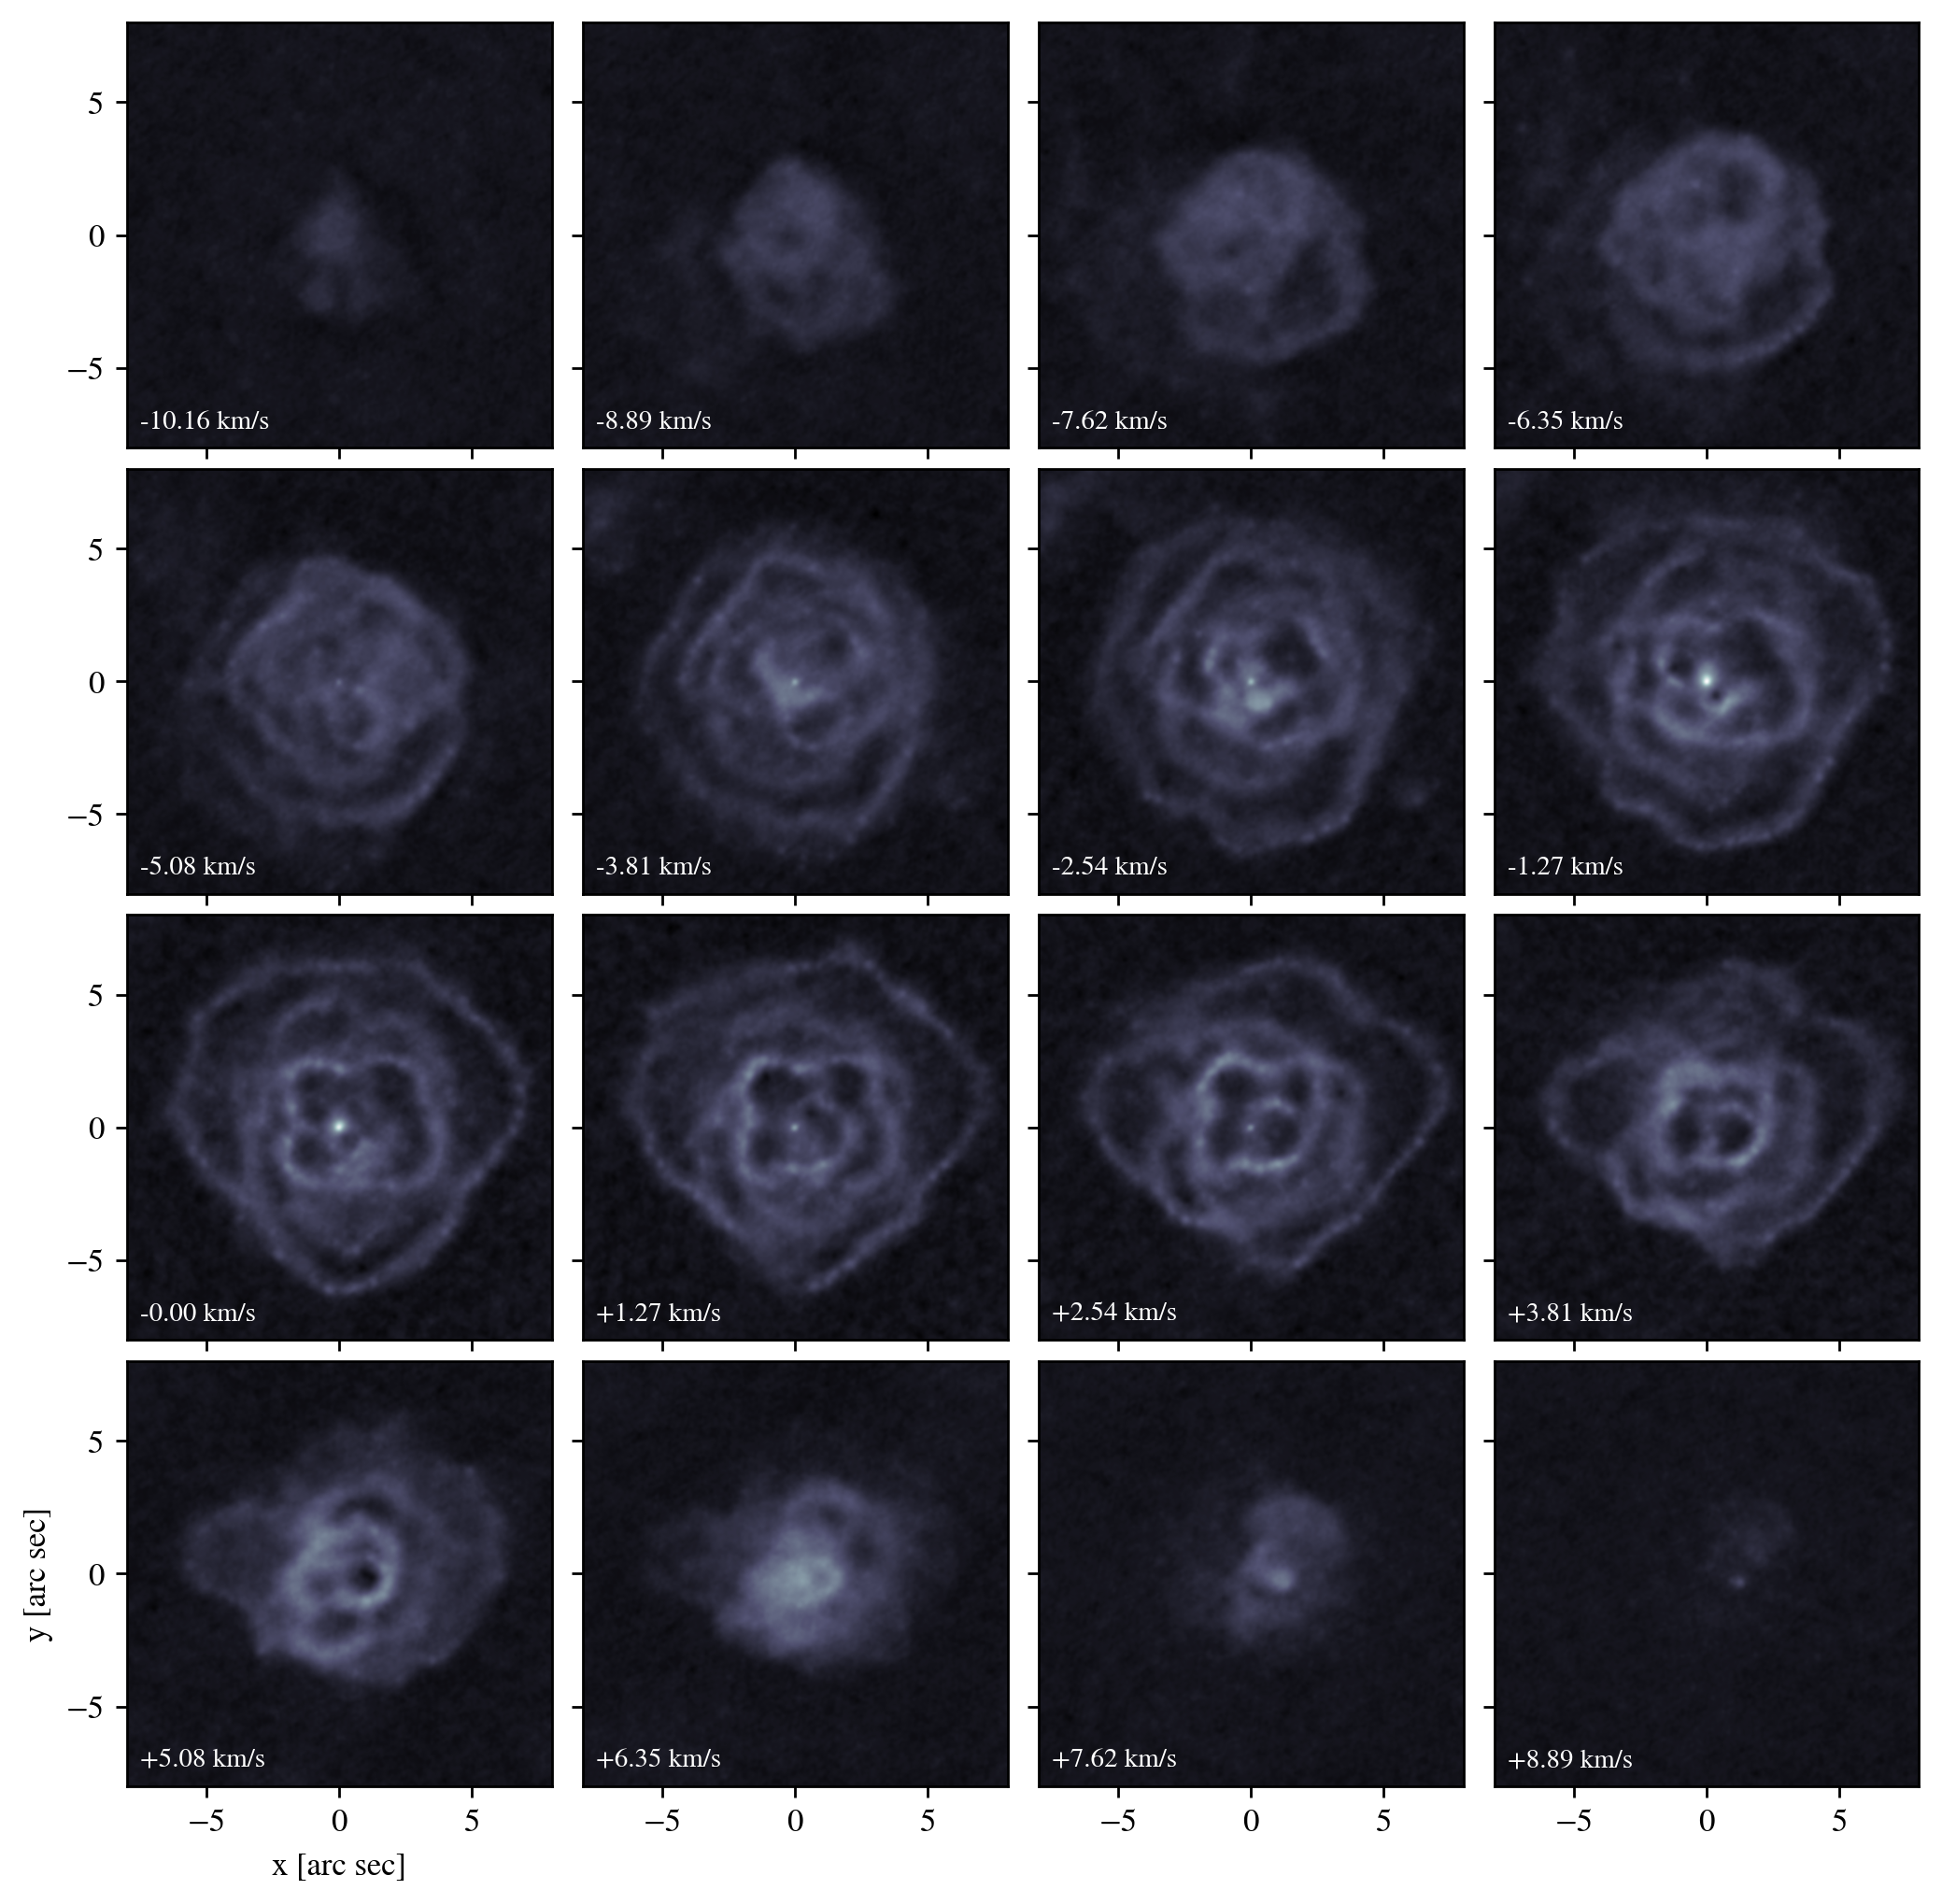

In [18]:
vmin = obs.min()
vmax = obs.max()

fig, axes = plt.subplots(
    nrows       =   4,
    ncols       =   4,
    dpi         = 250,
    sharex      = True,
    sharey      = True,
    figsize     = (10, 10),
    gridspec_kw = {'wspace':0.03, 'hspace':0.05}
)

for i, ax in enumerate(axes.ravel()):
    pcm = ax.imshow(obs[i+6], vmin=vmin, vmax=vmax, cmap='bone', extent=(xs_max, xs_min, ys_min, ys_max), origin='lower')
    ax.text(-7.5, -7.25, f'{velos[i+6]:+.2f} km/s', color='white', size='small')
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)

axes[3,0].set_xlabel('x [arc sec]')
axes[3,0].set_ylabel('y [arc sec]')

# fig.colorbar(pcm, ax=axes.ravel().tolist(), shrink=0.9)

In [19]:
spatial_average = obs.sum(axis=(1,2))
line_centre     = obs_freqs[np.where(spatial_average==spatial_average.max())[0][0]]

In [20]:
line = Line('CO', 1)

You have selected line:
    CO(J=2-1)
Please check the properties that were inferred:
    Frequency         2.305380000e+11  Hz
    Einstein A coeff  6.910000000e-07  1/s
    Molar mass        28.0101          g/mol


In [21]:
v_los = abs((1.0 - line_centre / (line.frequency * units.Hz)) * constants.c)
v_los

<Quantity 46328.79352163 m / s>

In [22]:
v_max = max(abs((1.0 - (obs_freqs / line_centre)) * constants.c.si)).value
v_max

19051.99170095877

In [23]:
o = obs.T
# fqs = freqs

def half_resolution(x):
    return x[0::2,0::2,:] + x[0::2,1::2,:] + x[1::2,0::2,:] + x[1::2,1::2,:]

# Create a list of hiearchically reduced observations
o_list = [o]
while o.shape[0]/2 >= 100:
    o = half_resolution(o)
    o_list.append(o)

for i, o in enumerate(o_list):
    print(f'o_list[{i}].shape =', list(o.shape))

o_list[0].shape = [3200, 3200, 29]
o_list[1].shape = [1600, 1600, 29]
o_list[2].shape = [800, 800, 29]
o_list[3].shape = [400, 400, 29]
o_list[4].shape = [200, 200, 29]
o_list[5].shape = [100, 100, 29]


In [24]:
obs = o

vmin = obs.min()
vmax = obs.max()

# Define a plot function
def plot(f):
    plt.figure(dpi=150)
    plt.imshow(obs[:,:,f], vmin=vmin, vmax=vmax)
            
interact(plot, f=(0, obs.shape[2]-1))

interactive(children=(IntSlider(value=14, description='f', max=28), Output()), _dom_classes=('widget-interact'…

<function __main__.plot(f)>

In [25]:
obs = o_list[-1]

# Define a plot function
ymin = obs.min()
ymax = obs.max()

def plot(i,j):
    plt.figure(dpi=150)
    plt.step(obs_freqs, obs[i,j,:])
    plt.ylim((ymin, ymax))
    plt.axvline(line_centre.value, c='k')

# Return an interactive ipywidget
interact(
    plot,
    i=(0, obs.shape[0]-1),
    j=(0, obs.shape[1]-1)
)

interactive(children=(IntSlider(value=49, description='i', max=99), IntSlider(value=49, description='j', max=9…

<function __main__.plot(i, j)>

In [26]:
obs = torch.from_numpy(o_list[-1])
sizes = (s_x, s_y, s_z)
shape = (obs.shape[0], obs.shape[1], 100)
freqs = torch.from_numpy(obs_freqs.si.value)

In [27]:
np.save('obs_CO_J=2-1_res=100x100x29.npy', obs  .numpy())
np.save('frq_CO_J=2-1_res=100x100x29.npy', freqs.numpy())

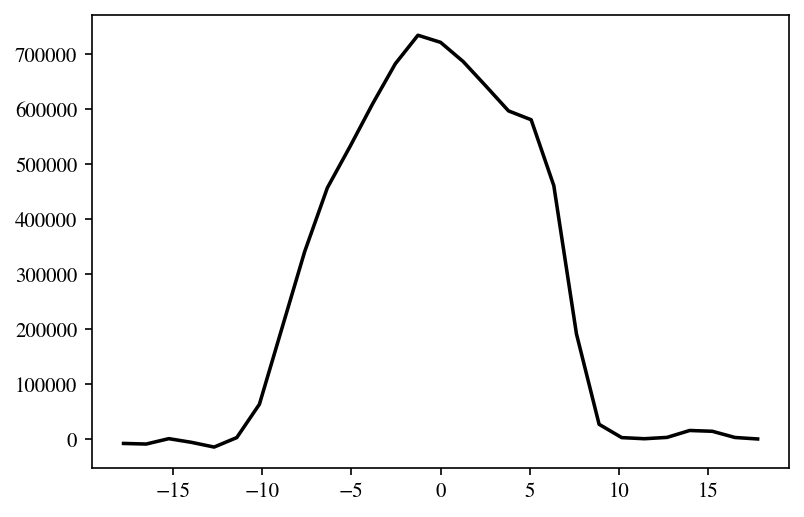

In [28]:
plt.figure(dpi=150)
plt.plot(velos, obs.sum(axis=(0,1)), c='k', linewidth=1.7)

In [29]:
model = TensorModel(
    sizes  = sizes,
    shape  = shape,
)

In [30]:
model.save('tm_R_Aql_base_res=100.h5')